# Importing python library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading dataset

In [2]:
df = pd.read_csv("C:\\Users\\91639\\Downloads\\EV.csv")

In [3]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
4,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280


In [4]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
10074,World,Projection-APS,EV sales share,Vans,EV,2030,percent,30.0
10075,World,Projection-APS,EV stock share,Vans,EV,2030,percent,8.0
10076,World,Projection-APS,EV sales share,Cars,EV,2030,percent,41.0
10077,World,Projection-APS,EV stock share,Cars,EV,2030,percent,15.0
10078,World,Projection-APS,EV stock share,Trucks,EV,2030,percent,4.0


In [5]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      10079 non-null  object 
 1   category    10079 non-null  object 
 2   parameter   10079 non-null  object 
 3   mode        10079 non-null  object 
 4   powertrain  10079 non-null  object 
 5   year        10079 non-null  int64  
 6   unit        10079 non-null  object 
 7   value       10079 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 630.1+ KB


## Unique Value in a column

In [7]:
print(df['region'].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other Europe' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkiye' 'United Kingdom' 'USA' 'World']


In [8]:
print(df['category'].unique())

['Historical' 'Projection-STEPS' 'Projection-APS']


In [9]:
print(df['parameter'].unique())

['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [10]:
print(df['mode'].unique())

['Cars' 'EV' 'Buses' 'Vans' 'Trucks']


In [11]:
print(df['powertrain'].unique())

['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']


In [12]:
print(df['year'].unique())

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2010 2025
 2030]


In [13]:
df.shape

(10079, 8)

In [14]:
print(df['unit'].unique())

['Vehicles' 'percent' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']


In [15]:
df.describe()

,year,value
count,10079.000000,1.007900e+04
mean,2018.158349,2.208715e+05
std,4.593641,3.259770e+06
min,2010.000000,1.100000e-06
25%,2015.000000,6.700000e-01
50%,2018.000000,6.300000e+01
75%,2021.000000,3.400000e+03
max,2030.000000,1.800000e+08


In [16]:
df.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [17]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [18]:
Ev_sales=df.loc[df['parameter'] == 'EV sales']
Ev_sale = Ev_sales.loc[Ev_sales['category']=='Historical']
world_Ev_sale=Ev_sale.loc[Ev_sale['region']=='World']
world = world_Ev_sale.groupby('year')['value'].sum()


In [19]:
world=pd.DataFrame(world)
world.reset_index(inplace=True)


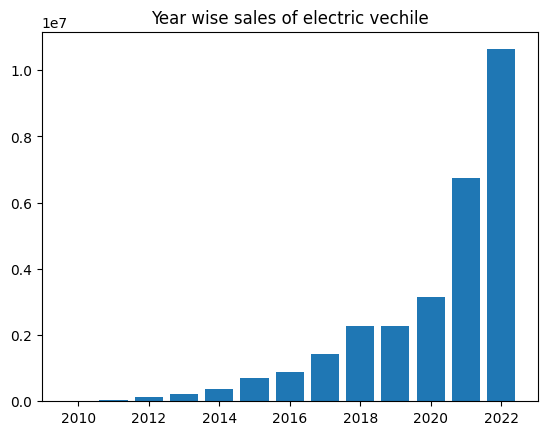

In [20]:
plt.title("Year wise sales of electric vechile")
plt.bar('year','value',data=world)
plt.show()


In [21]:
car=world_Ev_sale.loc[world_Ev_sale['mode']=='Cars']
bev =car.loc[car['powertrain']=='BEV'] 
phev =car.loc[car['powertrain']=='PHEV']

In [30]:
car[:5]

,region,category,parameter,mode,powertrain,year,unit,value
9165,World,Historical,EV sales,Cars,BEV,2010,Vehicles,7200.0
9167,World,Historical,EV sales,Cars,PHEV,2010,Vehicles,370.0
9194,World,Historical,EV sales,Cars,PHEV,2011,Vehicles,9000.0
9196,World,Historical,EV sales,Cars,BEV,2011,Vehicles,39000.0
9253,World,Historical,EV sales,Cars,BEV,2012,Vehicles,58000.0


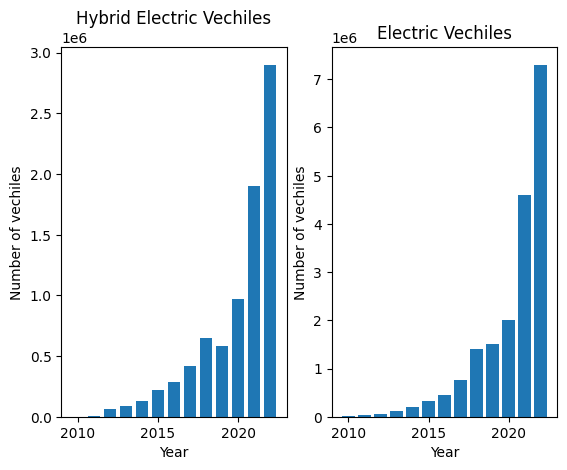

In [23]:
plt.subplot(1,2,1)
plt.title('Hybrid Electric Vechiles')
plt.xlabel('Year')
plt.ylabel('Number of vechiles')
plt.bar('year','value',data=phev)
plt.subplot(1,2,2)
plt.title('Electric Vechiles')
plt.xlabel('Year')
plt.ylabel('Number of vechiles')
plt.bar('year','value',data=bev)
plt.show()




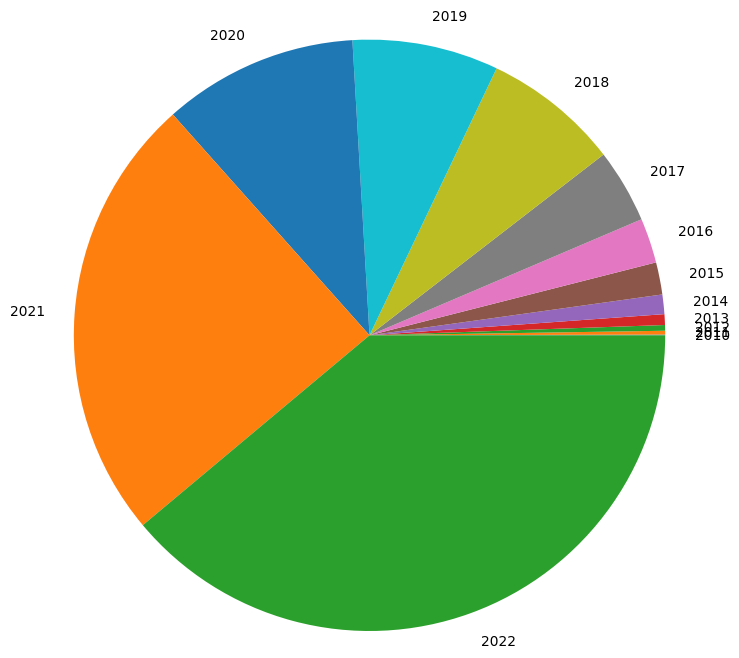

In [24]:
plt.pie('value',labels='year',data=bev,radius=2)
plt.show()

In [25]:
Ev=df.loc[df['parameter'] == 'EV charging points']
Ev_s = Ev.loc[Ev['category']=='Projection-STEPS']
charg=Ev_s.loc[Ev_s['region']=='World']

In [26]:
charge=charg.groupby('year').sum()
charge.reset_index(inplace=True)
charge

,year,region,category,parameter,mode,powertrain,unit,value
0,2020,WorldWorld,Projection-STEPSProjection-STEPS,EV charging pointsEV charging points,EVEV,Publicly available fastPublicly available slow,charging pointscharging points,1260000.0
1,2021,WorldWorld,Projection-STEPSProjection-STEPS,EV charging pointsEV charging points,EVEV,Publicly available fastPublicly available slow,charging pointscharging points,1770000.0
2,2022,WorldWorld,Projection-STEPSProjection-STEPS,EV charging pointsEV charging points,EVEV,Publicly available fastPublicly available slow,charging pointscharging points,2700000.0
3,2025,WorldWorld,Projection-STEPSProjection-STEPS,EV charging pointsEV charging points,EVEV,Publicly available fastPublicly available slow,charging pointscharging points,6700000.0
4,2030,WorldWorld,Projection-STEPSProjection-STEPS,EV charging pointsEV charging points,EVEV,Publicly available fastPublicly available slow,charging pointscharging points,12700000.0


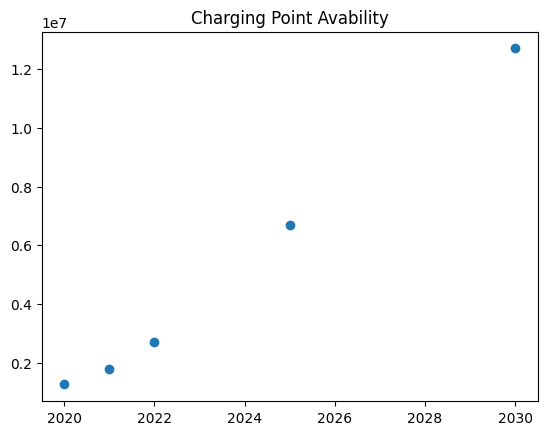

In [28]:
plt.title("Charging Point Avability")
plt.scatter("year","value",data=charge)
plt.show()